# Data Collection and Preparation:

In [1]:
import nltk
from nltk.corpus import gutenberg

# Download Jane Austen's works from NLTK's Gutenberg corpus
nltk.download('gutenberg')
nltk.download('punkt')

# Load Jane Austen's texts
emma = gutenberg.raw('austen-emma.txt')
pride_and_prejudice = gutenberg.raw('austen-persuasion.txt')
sense_and_sensibility = gutenberg.raw('austen-sense.txt')

# Tokenize the text
emma_tokens = nltk.word_tokenize(emma)
pride_and_prejudice_tokens = nltk.word_tokenize(pride_and_prejudice)
sense_and_sensibility_tokens = nltk.word_tokenize(sense_and_sensibility)



[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [11]:
emma=emma.lower()
pride_and_prejudice=pride_and_prejudice.lower()
sense_and_sensibility=sense_and_sensibility.lower()

In [12]:
import re
def remove_html_tags(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'', text)

In [32]:
emma=remove_html_tags(emma)

In [33]:
pride_and_prejudice=remove_html_tags(pride_and_prejudice)

In [34]:
sense_and_sensibility=remove_html_tags(sense_and_sensibility)

In [16]:
import string

In [17]:
exclude = string.punctuation
def remove_punc(text):
    for char in exclude:
        text = text.replace(char ,  ' ')
    return text

In [35]:
emma=remove_punc(emma)

In [37]:
pride_and_prejudice=remove_punc(pride_and_prejudice)

In [38]:
sense_and_sensibility=remove_punc(sense_and_sensibility)

In [27]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [28]:
from nltk.corpus import stopwords

In [29]:
def remove_stopwords(text):
    new_text = []
    for word in text.split():
        if word in stopwords.words('english'):
            new_text.append('')
        else:
            new_text.append(word)
    x = new_text[:]
    new_text.clear()
    return ' '.join(x)

In [39]:
emma=remove_stopwords(emma)

In [40]:
emma

'emma  jane austen 1816 volume  chapter  emma woodhouse handsome clever  rich   comfortable home  happy disposition seemed  unite    best blessings  existence   lived nearly twenty one years   world   little  distress  vex     youngest   two daughters    affectionate indulgent father    consequence   sister  marriage  mistress   house    early period  mother  died  long ago        indistinct remembrance   caresses   place   supplied   excellent woman  governess   fallen little short   mother  affection sixteen years  miss taylor   mr woodhouse  family less   governess   friend  fond   daughters  particularly  emma       intimacy  sisters even  miss taylor  ceased  hold  nominal office  governess  mildness   temper  hardly allowed   impose  restraint   shadow  authority   long passed away    living together  friend  friend  mutually attached  emma     liked highly esteeming miss taylor  judgment  directed chiefly     real evils indeed  emma  situation   power   rather  much   way   disp

In [41]:
emma_tokens = nltk.word_tokenize(emma)
pride_and_prejudice_tokens = nltk.word_tokenize(pride_and_prejudice)
sense_and_sensibility_tokens = nltk.word_tokenize(sense_and_sensibility)

# Sentiment Analysis:

In [43]:
pip install afinn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53429 sha256=a5d793e1d8bd58e6afcbaca76fc8ad872674d90a1ce8eb06e53a0aebb75e52c1
  Stored in directory: /root/.cache/pip/wheels/b0/05/90/43f79196199a138fb486902fceca30a2d1b5228e6d2db8eb90
Successfully built afinn


In [45]:
nltk.download('opinion_lexicon')

[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Unzipping corpora/opinion_lexicon.zip.


True

In [47]:
from afinn import Afinn
from nltk.corpus import opinion_lexicon

# Initialize lexicons
afinn = Afinn()
positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())

# Calculate sentiment scores for each word in the text using AFINN
afinn_scores = [afinn.score(token) for token in emma_tokens]

# Calculate sentiment scores for each word in the text using Bing Liu Lexicon
bing_liu_scores = [1 if word in positive_words else -1 if word in negative_words else 0 for word in emma_tokens]

# Aggregate sentiment scores for each document (sum of scores)
afinn_document_score = sum(afinn_scores)
bing_liu_document_score = sum(bing_liu_scores)

# Classify documents into positive or negative sentiments
def classify_sentiment(score):
    if score > 0:
        return "Positive"
    elif score < 0:
        return "Negative"
    else:
        return "Neutral"

# Classify sentiment for documents using AFINN
afinn_sentiment = classify_sentiment(afinn_document_score)

# Classify sentiment for documents using Bing Liu Lexicon
bing_liu_sentiment = classify_sentiment(bing_liu_document_score)

print(f"AFINN Document Sentiment: {afinn_sentiment} (Score: {afinn_document_score})")
print(f"Bing Liu Document Sentiment: {bing_liu_sentiment} (Score: {bing_liu_document_score})")



AFINN Document Sentiment: Positive (Score: 7921.0)
Bing Liu Document Sentiment: Positive (Score: 2348)


In [49]:
from afinn import Afinn
from nltk.corpus import opinion_lexicon

# Initialize lexicons
afinn = Afinn()
positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())

# Calculate sentiment scores for each word in the text using AFINN
afinn_scores = [afinn.score(token) for token in pride_and_prejudice_tokens]

# Calculate sentiment scores for each word in the text using Bing Liu Lexicon
bing_liu_scores = [1 if word in positive_words else -1 if word in negative_words else 0 for word in emma_tokens]

# Aggregate sentiment scores for each document (sum of scores)
afinn_document_score = sum(afinn_scores)
bing_liu_document_score = sum(bing_liu_scores)

# Classify documents into positive or negative sentiments
def classify_sentiment(score):
    if score > 0:
        return "Positive"
    elif score < 0:
        return "Negative"
    else:
        return "Neutral"

# Classify sentiment for documents using AFINN
afinn_sentiment = classify_sentiment(afinn_document_score)

# Classify sentiment for documents using Bing Liu Lexicon
bing_liu_sentiment = classify_sentiment(bing_liu_document_score)

print(f"AFINN Document Sentiment: {afinn_sentiment} (Score: {afinn_document_score})")
print(f"Bing Liu Document Sentiment: {bing_liu_sentiment} (Score: {bing_liu_document_score})")



AFINN Document Sentiment: Positive (Score: 3383.0)
Bing Liu Document Sentiment: Positive (Score: 2348)


In [50]:
from afinn import Afinn
from nltk.corpus import opinion_lexicon

# Initialize lexicons
afinn = Afinn()
positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())

# Calculate sentiment scores for each word in the text using AFINN
afinn_scores = [afinn.score(token) for token in pride_and_prejudice_tokens]

# Calculate sentiment scores for each word in the text using Bing Liu Lexicon
bing_liu_scores = [1 if word in positive_words else -1 if word in negative_words else 0 for word in sense_and_sensibility_tokens]

# Aggregate sentiment scores for each document (sum of scores)
afinn_document_score = sum(afinn_scores)
bing_liu_document_score = sum(bing_liu_scores)

# Classify documents into positive or negative sentiments
def classify_sentiment(score):
    if score > 0:
        return "Positive"
    elif score < 0:
        return "Negative"
    else:
        return "Neutral"

# Classify sentiment for documents using AFINN
afinn_sentiment = classify_sentiment(afinn_document_score)

# Classify sentiment for documents using Bing Liu Lexicon
bing_liu_sentiment = classify_sentiment(bing_liu_document_score)

print(f"AFINN Document Sentiment: {afinn_sentiment} (Score: {afinn_document_score})")
print(f"Bing Liu Document Sentiment: {bing_liu_sentiment} (Score: {bing_liu_document_score})")



AFINN Document Sentiment: Positive (Score: 3383.0)
Bing Liu Document Sentiment: Positive (Score: 1275)


# Visualization:

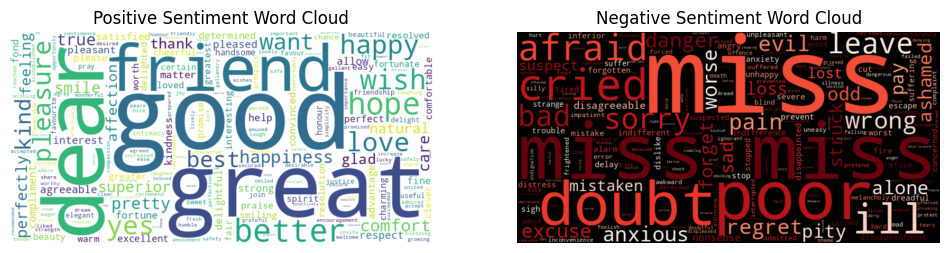

In [48]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter tokens based on sentiment scores (positive and negative)
positive_tokens = [token for token, score in zip(emma_tokens, afinn_scores) if score > 0]
negative_tokens = [token for token, score in zip(emma_tokens, afinn_scores) if score < 0]

# Join tokens into strings
positive_text = " ".join(positive_tokens)
negative_text = " ".join(negative_tokens)

# Create WordCloud for positive sentiment
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Create WordCloud for negative sentiment
negative_wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_text)

# Plot WordClouds
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Sentiment Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Sentiment Word Cloud')
plt.axis('off')

plt.show()


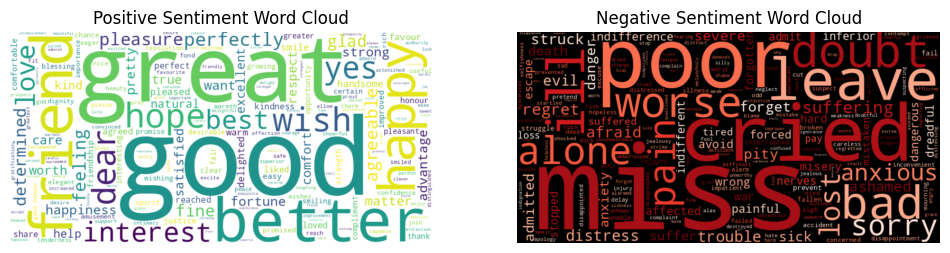

In [51]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter tokens based on sentiment scores (positive and negative)
positive_tokens = [token for token, score in zip(pride_and_prejudice_tokens, afinn_scores) if score > 0]
negative_tokens = [token for token, score in zip(pride_and_prejudice_tokens, afinn_scores) if score < 0]

# Join tokens into strings
positive_text = " ".join(positive_tokens)
negative_text = " ".join(negative_tokens)

# Create WordCloud for positive sentiment
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Create WordCloud for negative sentiment
negative_wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_text)

# Plot WordClouds
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Sentiment Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Sentiment Word Cloud')
plt.axis('off')

plt.show()


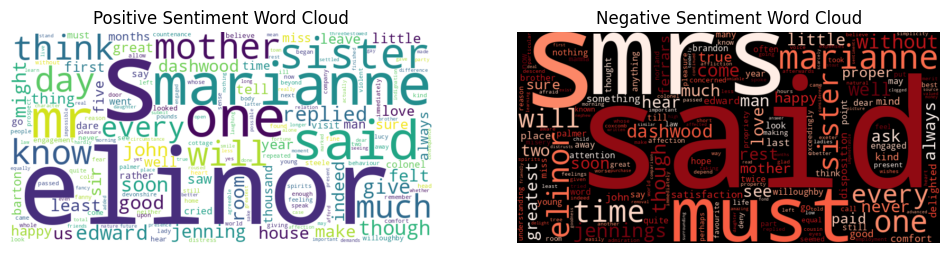

In [52]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter tokens based on sentiment scores (positive and negative)
positive_tokens = [token for token, score in zip(sense_and_sensibility_tokens, afinn_scores) if score > 0]
negative_tokens = [token for token, score in zip(sense_and_sensibility_tokens, afinn_scores) if score < 0]

# Join tokens into strings
positive_text = " ".join(positive_tokens)
negative_text = " ".join(negative_tokens)

# Create WordCloud for positive sentiment
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Create WordCloud for negative sentiment
negative_wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_text)

# Plot WordClouds
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Sentiment Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Sentiment Word Cloud')
plt.axis('off')

plt.show()
